In [5]:
# Import modules
import rdkit
from rdkit.Chem.Lipinski import rdMolDescriptors
from IPython.display import SVG
from notebook_utils import draw_molecule

# Suppress RDKit Output
rdkit.RDLogger.DisableLog('rdApp.*')

# Print versions
print(f"RDKit Version: {rdkit.__version__}")

RDKit Version: 2025.03.6


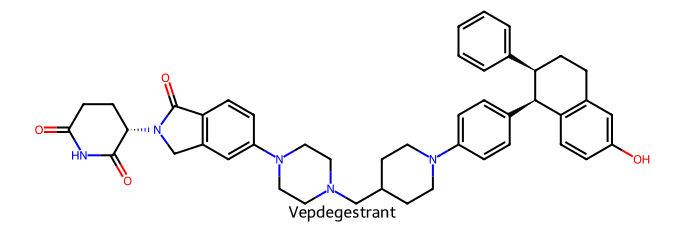

In [11]:
smiles = "C1CC2=C(C=CC(=C2)O)[C@H]([C@H]1C3=CC=CC=C3)C4=CC=C(C=C4)N5CCC(CC5)CN6CCN(CC6)C7=CC8=C(C=C7)C(=O)N(C8)[C@H]9CCC(=O)NC9=O"
name = "Vepdegestrant"
# smiles = "CC1(CCC(=C(C1)c2ccc(cc2)Cl)CN3CCN(CC3)c4ccc(c(c4)Oc5cc6cc[nH]c6nc5)C(=O)NS(=O)(=O)c7ccc(c(c7)[N+](=O)[O-])NCC8CCOCC8)C"
# name = "Venetoclax"
mol = rdkit.Chem.MolFromSmiles(smiles)
# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name,
)
SVG(img)

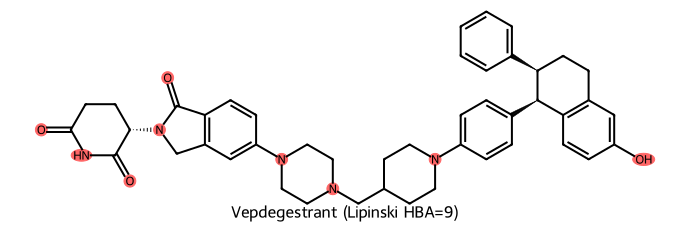

In [13]:
# Find all HBA atoms in the molecule, defined by Lipinski (All Ns and Os)
lipinski_hba_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() in (7, 8)]
hba = rdMolDescriptors.CalcNumLipinskiHBA(mol)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (Lipinski HBA={hba})", 
    highlight_atoms = lipinski_hba_atoms,
    highlight_color = (1.0, 0.4, 0.4)
)
SVG(img)

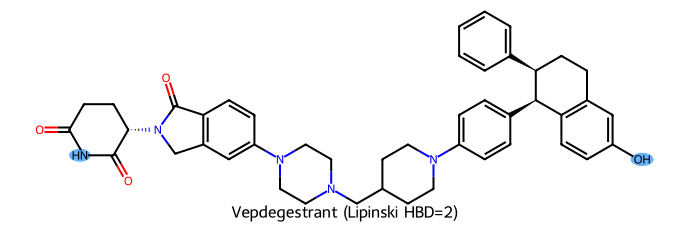

In [18]:
# Find all HBD atoms in the molecule, defined by Lipinski (All NHs and OHs)
lipinski_hba_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in (7, 8)]
lipinski_hbd_atoms = [atom.GetIdx() for atom in lipinski_hba_atoms if atom.GetTotalNumHs() > 0]
hbd = rdMolDescriptors.CalcNumLipinskiHBD(mol)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (Lipinski HBD={hbd})", 
    highlight_atoms = lipinski_hbd_atoms,
    highlight_color = (0.4, 0.7, 1.0)
)
SVG(img)

In [7]:
# HDonorSmarts = Chem.MolFromSmarts('[$([N;!H0;v3]),$([N;!H0;+1;v4]),$([O,S;H1;+0]),$([n;H1;+0])]')
# HAcceptorSmarts = Chem.MolFromSmarts('[$([O,S;H1;v2]-[!$(*=[O,N,P,S])]),' +
#                                      '$([O,S;H0;v2]),$([O,S;-]),$([N;v3;!$(N-*=!@[O,N,P,S])]),' +
#                                      '$([nH0,o,s;+0])]')

In [8]:
# # Calculate all RDKit descriptors
# descriptors = {
#     "SMILES": rdkit.Chem.MolToSmiles(mol),
# }
# for descriptor, fxn in rdkit.Chem.Descriptors._descList:
#     try:
#         value = fxn(mol)
#     except Exception as e:
#         value = None
#     descriptors[f"{descriptor}"] = value
# descriptors

In [9]:
print((255/255, 102/255, 102/255))

(1.0, 0.4, 0.4)
